In [1]:
from sklearn.datasets import load_iris
import pandas as pd 

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['flower'] = iris.target 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis = 1, inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


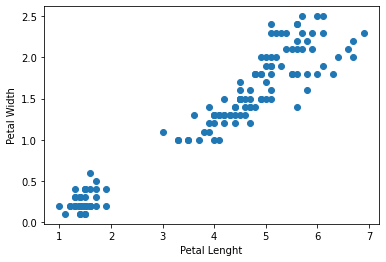

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel("Petal Lenght")
plt.ylabel("Petal Width")
plt.show()


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])


In [17]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


**Elbow Method**

In [25]:
from sklearn.cluster import KMeans
sse = []
max_limit = 10
k_range = range(1,max_limit)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

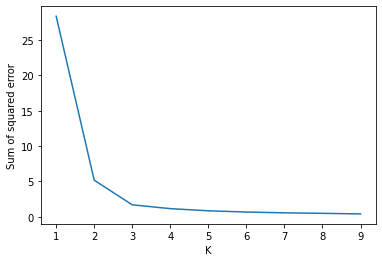

In [26]:
plt.plot(k_range, sse)
plt.ylabel("Sum of squared error")
plt.xlabel("K")
plt.show()

In [20]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1615234094205578,
 0.853861735391224,
 0.6801035704886196,
 0.5658013138564928,
 0.48699860502649284,
 0.41363725779406146,
 0.3661970149809267,
 0.33015315734204886,
 0.31154428013903,
 0.2720845650503797,
 0.24211519853733837,
 0.22289793584358422,
 0.21791770033781724,
 0.19773592892881084,
 0.1890133615236555,
 0.16650217812861154,
 0.1669117362181421,
 0.14750580086529114,
 0.1373246966332976,
 0.13426786102007704,
 0.11812667500385202,
 0.11951443101646636,
 0.11100603774847659,
 0.10515055983525001,
 0.09484635055313087,
 0.09366485898648219,
 0.09144000573692562,
 0.08489218492194175,
 0.08010848563723591,
 0.08080715878829743,
 0.07204023169902676,
 0.06875864459383518,
 0.06745708693660518,
 0.06377611505257565,
 0.0611283476749224,
 0.05682934375232743,
 0.05479244719349483,
 0.052485371148403494,
 0.05014305302361042,
 0.049585994819382306,
 0.0476617135690498,
 0.045851139509795406,
 0.042072533492473876,
 0.

In [21]:
km = KMeans(n_clusters = 3)
yp = km.fit_predict(df)
yp 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
df['Cluster'] = yp 
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [23]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]


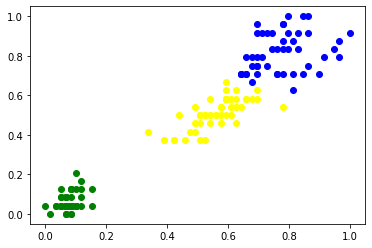

In [24]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="green")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="yellow")
plt.show()